# 11: Pandas for data analysis with Python: Part 2

## Learning objectives

Last week, we learned:
- Pandas is a library in Python that is designed for data manipulation and analysis
- How to use libraries (import them, access their functions and data structures with `library.function_name()`)
- About the `dataframe` data structure: basically a smart spreadsheet, with rows of observations, and columns of variables/data for each observation - sort of a cross between a list (sortable, indexable) and a dictionary (quickly access data by key)
- Some basic operations: constructing a dataframe, summarizing, subsetting, reshaping

This week, we'll most dig into more advanced operations for reshaping/modifying your dataframe:
- Use `.apply()` to apply functions to one or more columns to generate new columns
- Use `.groupby()` to split your data into subgroups, apply some function to their data, then combine them into a new dataframe for further analysis (the "**split-apply-combine**" pattern that is fundamental to data analysis with pandas)
- Use some basic plotting functions to explore your data

These roughly correspond to Qs 6-8 in your PCEs.

If we have time, we'll learn a bit more about summarization:
- Use `.value_counts()` to summarize categorical data
- How to plot data

The files we'll be working with in this session are the datasets we're giving for Project 4.

In [1]:
import pandas as pd
fpath = 'data/testudo_fall2020.csv'
courses = pd.read_csv(fpath) # read in the file into a dataframe called courses
courses.head() # use the .head() function to show the top 5 rows in the dataframe

,code,title,description,prereqs,credits,prereq_type,area
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST
3,AMST418N,Asian American Public Policy,,None,3,None,AMST
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST


## Creating/modifying data columns based on one or more columns using `.apply()`

More advanced operations on dataframes involve modifying or creating new columns!

In data analysis, we often want to do things to data in our columns for data preparation/cleaning. Sometimes there is missing data we want to recode, or we want to redescribe data or reclassify it for our analysis. We can do this with a combination of functions and the `apply()` method.

In this way, again making a connection back to lists, `.apply()` is a little like the `map()` function that we used for lists to transform items from one list to another list with equal length (e.g., convert scores to letter grades).

### `.apply()` with a single column

The simpler version of `.apply()` only takes input from one column.

Let's say we want to have a prereqs column that is sortable, maybe 0 = No prereqs, and 1 = has prereqs

#### Step 1: Define the function you want to apply

In [2]:
# Step 1: define the function you want to apply
def has_prereq(prereq_descr):
  # assume we get a string prereq description
  if "None" in prereq_descr:
    return 0
  else:
    return 1

In [3]:
# test the function
prereq = "BMGT301; or instructor permission" # this should yield 1
prereq2 = "None" # this should yield 0
print(has_prereq(prereq))
print(has_prereq(prereq2))

1
0


#### Step 2: Apply the function to a column

In [4]:
courses_copy = pd.read_csv("data/testudo_fall2020.csv")

In [5]:
# Step 2: apply it to one or more columns
courses['has_prereqs'] = courses['prereqs'].apply(has_prereq) # apply the has_prereq() function to every row in the prereqs column in the courses data frame
courses.head(30)

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,None,AMST,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,None,AMST,0
7,AMST856,Museum Research Seminar,A research seminar focusing on the practice a...,"AMST655, ANTH655, or HIST610.",3,Flexible,AMST,1
8,AMST857,Museum Scholarship Practicum,Students devise and carry out a research prog...,"AMST856, ANTH856, or HIST810.",3,Flexible,AMST,1
9,BMGT190H,Introduction to Design and Quality,QUEST students learn and apply design practic...,None,4,None,BMGT,0


In [6]:
def is_intro(title):
    if "introduction" in title.lower():
        return 1
    else:
        return 0

courses['is_intro'] = courses['title'].apply(is_intro)
courses.head(30)

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,is_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0
5,AMST498J,Asian American Politics,Students will gain a greater understanding of...,None,3,None,AMST,0,0
6,AMST603,Current Approaches to American Studies,Builds on AMST601 and explores contemporary l...,None,3,None,AMST,0,0
7,AMST856,Museum Research Seminar,A research seminar focusing on the practice a...,"AMST655, ANTH655, or HIST610.",3,Flexible,AMST,1,0
8,AMST857,Museum Scholarship Practicum,Students devise and carry out a research prog...,"AMST856, ANTH856, or HIST810.",3,Flexible,AMST,1,0
9,BMGT190H,Introduction to Design and Quality,QUEST students learn and apply design practic...,None,4,None,BMGT,0,1


If you're lazy, you can pass in anonymous functions too, with `lambda`: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

In [7]:
courses['title']

0                         Introduction American Studies 
1                Introduction to Asian American Studies 
2       Introduction to History, Theories and Methods...
3                          Asian American Public Policy 
4                           Seminar in American Studies 
                             ...                        
409                                The Planning Process 
410                                  Planning Economics 
411                         Transportation and Land Use 
412     City and Regional Economic Development Planning 
413                          Seminar in Research Design 
Name: title, Length: 414, dtype: object

In [8]:
courses['title'].apply(lambda title: 1 if "introduction" in title.lower() else 0)

0      1
1      1
2      1
3      0
4      0
      ..
409    0
410    0
411    0
412    0
413    0
Name: title, Length: 414, dtype: int64

##### What's happening under the hood

In [9]:
for prereq in courses['prereqs']:
    print(has_prereq(prereq))

0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1


In [10]:
courses.head()

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,is_intro
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0


As another example, let's say I want to know how many courses we have in each area. We don't have that data in the dataset; at least not explicitly. Fortunately we can make it with some simple programming that you already know how to do! The problem here is, given a code (i.e., data from one column), how do we "extract" the area?

In [11]:
# Step 1: define the function
def extract_area(code):
    # heuristic: just grab the first four characters
    return 

In [12]:
c = "CMSC250"
extract_area(c)

In [13]:
courses.columns

Index(['code', 'title', 'description', 'prereqs', 'credits', 'prereq_type',
       'area', 'has_prereqs', 'is_intro'],
      dtype='object')

In [14]:
courses = courses.drop(columns="has_intro")
courses.head()

KeyError: "['has_intro'] not found in axis"

Let's see how this works!

The `.apply()` function generates a list that is the same length as the input column's number of rows, with a corresponding value for each input (in this case, we have 414 area codes in the output "list")

In [ ]:
# Step 2: apply the function
courses['area'] = courses['code'].apply(extract_area)
courses.head(10)

In [ ]:
# the bread dataset
bread = pd.read_csv("data/BreadBasket_DMS.csv")

In [ ]:
def extract_hour(time):
    return int(time.split(":")[0])

bread['Hour'] = bread['Time'].apply(extract_hour)
bread.sort_values(by="Hour")

Here's another view of what's going on, with syntax you're a bit more familiar with.

In [ ]:
# show what's happening inside, basically applying to each row
for prereq in courses['prereqs'].values[:10]:
    print("Prereq is...", prereq)
    val = has_prereq(prereq)
    print("Has prereq = ", val, "\n")

#### Step 3: Save the resulting data from the `.apply()` into a new/existing column

What if we want to save the results so we can use it later? We can simply assign it to a column, new or existing. Remember, pandas prefers immutability in general (return a new object instead of modifying the object), and sometimes enforces it. With apply, it's enforced: you can't do it in place, you have to assign the returned series to a new variable if you want it to persist. To see this, notice that when we print out hte dataframe again, we don't see changes to the code or any trace of what we did in the dataframe.

In [ ]:
courses.head()

Let's now save it by assigning it to a new column in the dataframe

*Side note: you can do this with [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) as well, but that's not pandas style. I show the syntax below, but unpacking it would be a distraction for now I think.*

In [ ]:
# apply the extract area function to every row in the courses 'code' column, then assign the resulting set of rows to the 'area' column in the courses dataframe
courses['area'] = courses['code'].apply(extract_area)
# list comprehension style
# courses['area'] = [extract_area(c) for c in courses['code']]
courses.head()

Now that new column is available for analysis!

Let's do another one to see how it works! Another thing we might want to know is whether or not a course is introductory. Here, we can do a simple thing of checking if the keyword "introduction" is in the course title.

In [ ]:
def is_intro(title):
    if "intro" in title.lower():
        return 1
    else:
        return 0

courses['is_intro'] = courses['title'].apply(is_intro)
courses.head()

In [ ]:
courses[courses['is_intro']==1]

### `.apply()` with data from multiple columns

What if you want to have a way to filter the courses in terms of "easy entry points" (i.e., both introductory *and* has no prerequisites)? That might also be interesting to analyze by area to see how many departments offer these easy entry points into the department for students from other departments.

Core thing we need to know here is that our `.apply()` will now apply a function that has a **row** as input, not an element of a single column. That way, we can access data from any column in the row: in this case, data from the "is_intro" and "has_prereq" columns.

There are two key differences between this use of `.apply()` and the single-column case:
1. First, we do `.apply()` with the whole dataframe, not from a single column
2. We specify an argument for the `axis` parameter to tell it to use rows as inputs. We need to pass the argument `1` to the axis parameter when we call `.apply()` so it knows to pass a row into the function, not just a single column element. See here for more details: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [20]:
# is_entry_point function
def is_entry_point(row):
  # if the value of the "is intro" column for this row is 1
  # AND the value of hte "has_prereq" column for this row is 0
  # return 1
  if row['is_intro'] == 1 and row['has_prereqs'] == 0: 
    return 1
  else:
    return 0

In [21]:
# this should yield 1
test_row = {
    'is_intro': 1,
    'has_prereqs': 0
}

# this should yield 0
test_row2 = {
    'is_intro': 1,
    'has_prereqs': 1
}

print(is_entry_point(test_row))
print(is_entry_point(test_row2))

1
0


In [22]:
# Step 2 apply the function and save the result
courses['is_entrypoint'] = courses.apply(is_entry_point, axis=1) # need to specify axis=1 to apply it to every row
# courses['classlevel'] = courses['classcode'].apply(level)
courses.head()

# compare to .apply() with a single column
# courses['is_intro'] = courses['title'].apply(is_intro)
# key differences:
# - here for multiple columns, we start with the whole dataframe, instead of a specific column
# - and we pass the argument 1 to the axis parameter instead of letting it use the default 0 value

,code,title,description,prereqs,credits,prereq_type,area,has_prereqs,is_intro,is_entrypoint
0,AMST101,Introduction American Studies,Introduces students to the interdisciplinary ...,None,3,None,AMST,0,1,1
1,AMST298C,Introduction to Asian American Studies,The aggregate experience of Asian Pacific Ame...,None,3,None,AMST,0,1,1
2,AMST340,"Introduction to History, Theories and Methods...",Introduction to the process of interdisciplin...,Must have completed AMST201; and 2 courses in...,3,Hard,AMST,1,1,0
3,AMST418N,Asian American Public Policy,,None,3,None,AMST,0,0,0
4,AMST450,Seminar in American Studies,Developments in theories and methods of Ameri...,AMST201 and AMST340; and 1 course in AMST.,3,Hard,AMST,1,0,0


In [ ]:
courses[courses['is_entrypoint'] == 1]

In [ ]:
(courses['has_prereq'] == 0) & (courses['is_intro'] == 1)

In [ ]:
# show me all the courses that are intro and have no prereqs
courses[courses['is_entrypoint'] == 1]
# if we have a list, we can do indexing like this to get the first 4 elements, say: courses[:4]
# if we have a dictionary, we can retrieve base don key, like this courses['hello']

More examples?

In [31]:
# for ncaa: make a column that is 1 if you had a winning season AND reached the round of 32
ncaa = pd.read_csv("data/ncaa-team-data-cleanCoachNames.csv")
ncaa.head()

def underdog_season(row):
    if row['w'] < 21 and row['ncaa_result'] == "Won National Final":
        return 1
    else:
        return 0
    
ncaa['underdog'] = ncaa.apply(underdog_season, axis=1)
ncaa[ncaa['underdog']==1]

,Unnamed: 0,school,conf,rk,w,l,srs,sos,pts_for,pts_vs,...,ap_pre,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,year,coach,underdog
8229,8229,indiana,Big Ten,78,20,3,NaN,NaN,NaN,NaN,...,30,30,30,NaN,Won National Final,48,1939-40,1939,Branch McCracken,1
23515,23515,wisconsin,Big Ten,77,20,3,NaN,NaN,NaN,NaN,...,30,30,30,NaN,Won National Final,48,1940-41,1940,Bud Foster,1


In [26]:
set(ncaa['ncaa_result'])

{'Lost First Four',
 'Lost First Round',
 'Lost National Final',
 'Lost National Semifinal',
 'Lost Opening Round',
 'Lost Regional Final',
 'Lost Regional Final (Final Four)',
 'Lost Regional Semifinal',
 'Lost Second Round',
 'Lost Third Round',
 'Playing First Four',
 'Playing First Round',
 'Won National Final',
 nan}

In [ ]:
# for ncaa: create a column taht is 1 if the pt differential is non-negative BUT the team didn't make the playoffs (numeric >= 32 or 0)

In [ ]:
# apply the get_month function to every value in the Date column in bread
# and store the resulting series in the Month column

In [ ]:
# convert the ncaa_result column to a numerical ranking of season outcome

## Analyze subgroups of your data with the split-apply-combine pattern

Going more deeply on the path of "reshaping", we often want to compute data based on subsets of the data, grouped by some column.

For example, we might want to see how many departments offer easy entry points. 

We can do this with the "split-apply-combine" pattern, which is implemented in the `.groupby()` function.

Basically, it goes like this:
1. **Split** the data into subgroups (e.g., split courses into department subgroups)
2. **Apply** some computation on each subgroup (e.g., find number of easy entry points for each department subgroup)
3. **Combine** subgroup-computation information into an overall new dataframe that has subgroups as entries

Here's a picture with a simpler datset to give an intuition:
<img src="https://miro.medium.com/v2/resize:fit:1400/1*w2oGdXv5btEMxAkAsz8fbg.png" height=600 width=800></img>

In [ ]:
for area, areaData in courses.groupby('area'):
    print(area)
    print(areaData)

### Split with `.groupby()`

The first step is to split the dataset into subgroups.

The manual way

In [32]:
# get all the unique area values
course_areas = set(courses['area'].values)

# iterate through each unique area value
for area in course_areas:
    print(area)
    # get the subset of the course data that is associated with this area
    area_df = courses[courses['area'] == area]
    print(area_df.head())
    # summarize the credits for this subset of hte dataframe
    print(area_df['credits'].mean())
    print("\n")

PLCY
         code                                              title  \
319  PLCY101                    Great Thinkers on Public Policy    
320  PLCY201                 Public Leaders and Active Citizens    
321  PLCY215    Innovation and Social Change: Creating Change...   
322  PLCY301                                     Sustainability    
323  PLCY302               Examining Pluralism in Public Policy    

                                           description prereqs  credits  \
319   Great ideas in public policy, such as equalit...   None         3   
320   Aims to inspire, teach and engage students in...   None         3   
321   A team-based, highly interactive and dynamic ...   None         3   
322   Designed for students whose academic majors w...   None         3   
323   Understanding pluralism and how groups and in...   None         3   

    prereq_type  area  has_prereqs  is_intro  is_entrypoint  
319        None  PLCY            0         0              0  
320        

The `.groupby()` way

In [33]:
# use groupby to split the courses df into subsets grouped by area
# we can iterate through the resulting collection of dataframe subsets
# where each step in the iteration allows us to grab 
# 1. the name of the subset, which is the shared value (in this case area)
# 2. the subset dataframe (here called areaDF)
for area, areaDF in courses.groupby('area'):
    print(area)
    print(areaDF.head())
    print(areaDF['credits'].mean()) # starting to get into the "apply"

AMST
        code                                              title  \
0   AMST101                      Introduction American Studies    
1  AMST298C             Introduction to Asian American Studies    
2   AMST340    Introduction to History, Theories and Methods...   
3  AMST418N                       Asian American Public Policy    
4   AMST450                        Seminar in American Studies    

                                         description  \
0   Introduces students to the interdisciplinary ...   
1   The aggregate experience of Asian Pacific Ame...   
2   Introduction to the process of interdisciplin...   
3                                                      
4   Developments in theories and methods of Ameri...   

                                             prereqs  credits prereq_type  \
0                                              None         3        None   
1                                              None         3        None   
2   Must have completed 

In [ ]:
courses.head()

### Apply and Combine

#### The "manual" way: apply and combine into a new dataframe we construct from scratch

In [34]:
# create an empty list to hold the new rows of the new COMBINED dataframe
eba = []
# SPLIT the dataframe by area, and iterate through each split
for area, areaDF in courses.groupby('area'): 
  
    # APPLY operations on the dataframe split
    # count the number of entry point courses in the subarea
    num_entrypoints = areaDF['is_entrypoint'].sum()
    
    # count the number of total courses in the subarea
    num_classes = len(areaDF)
    
    # count the ratio of entry points to total classes
    entrypoint_ratio = num_entrypoints/num_classes
    
    # prepare a new row to put into the COMBINEd dataframe that has areas as rows instead of courses
    # the row is represented as a dictionary, where each key is a column
    entry = {
      'area': area, # each row is an area
      'num_entrypoints': num_entrypoints, 
      'num_classes': num_classes,
        'entry_point_ratio': entrypoint_ratio
    }
    # COMBINE the resulting subcomputation into a new dataset
    eba.append(entry) 
# convert the list of new entries into a dataframe
eba = pd.DataFrame(eba)
eba

,area,num_entrypoints,num_classes,entry_point_ratio
0,AMST,2,9,0.222222
1,BMGT,1,53,0.018868
2,CMSC,1,46,0.021739
3,COMM,0,31,0.000000
4,ECON,0,64,0.000000
5,ENSP,2,6,0.333333
6,ENTS,0,4,0.000000
7,INFM,0,5,0.000000
8,INST,4,47,0.085106
9,MATH,0,49,0.000000


In [35]:
# how many classes are in each area?
# make a data frame that summarizes it

# make a list to hold the combined data by subgroup
summarized = []

# SPLIT-APPLY-COMBINE
# SPLIT the dataset by area
for area, areaData in courses.groupby('area'):
    # APPLY a computation to get the number of courses
    # which is just the number of rows in this subset dataframe
    num_courses = len(areaData)
    entry = {
        'area': area,
        'num_courses': num_courses
    }
    # add it to the COMBINED summarized dataset
    summarized.append(entry)

# turn the list of dictionaries into a dataframe
summarized = pd.DataFrame(summarized)
summarized

,area,num_courses
0,AMST,9
1,BMGT,53
2,CMSC,46
3,COMM,31
4,ECON,64
5,ENSP,6
6,ENTS,4
7,INFM,5
8,INST,47
9,MATH,49


In [ ]:
# iterate through the dataframe, row by row
for index, row in eba.iterrows():
    print(row['area'])
    print(row['prereq_classes'])

We can define a whole new function that is much more complicated than a simple sum or mean, to APPLY to each subset of our SPLIT

For example, we can write a function that takes in a prereq description, and extracts all the prereq classes mentinoed in the description

In [36]:
def extract_prereqs(descr):
    prereqs = []
    for word in descr.split():
        # clean the word
        clean_word = ""
        for char in word:
            if char.isalpha() or char.isdigit():
                clean_word += char
        if len(clean_word) == 7 and clean_word[:4].isalpha() and clean_word[-3:].isdigit():
            prereqs.append(clean_word)
    return prereqs

In [ ]:
for area, areaDF in courses.groupby('area'):
    
    area_prereqs = set()
    for prereq in areaDF['prereqs']:
        prereqs = extract_prereqs(prereq)

In [ ]:
for prereq_descr in courses[courses['has_prereqs'] == 1]['prereqs'].values:
    print(prereq_descr)
    print(extract_prereqs(prereq_descr))

#### Shortcut apply-combine with `.agg()`

A more concise way to apply and combine is to chain the `.agg()` function to a `.groupby()` object to tell pandas to *aggregate* particular columns in particular ways (e.g., count the number of entry point courses in a given department, vs. give an average *proportion* of classes that are entry points).

In [37]:
# SPLIT by area
courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    # APPLY tehse computations and COMBINE into a new data frame using .agg
    num_entrypoints=('is_entrypoint', sum), 
    num_classes=('area', "count")
)

,area,num_entrypoints,num_classes
0,AMST,2,9
1,BMGT,1,53
2,CMSC,1,46
3,COMM,0,31
4,ECON,0,64
5,ENSP,2,6
6,ENTS,0,4
7,INFM,0,5
8,INST,4,47
9,MATH,0,49


Anatomy of combining `.groupby()` with `.agg()`

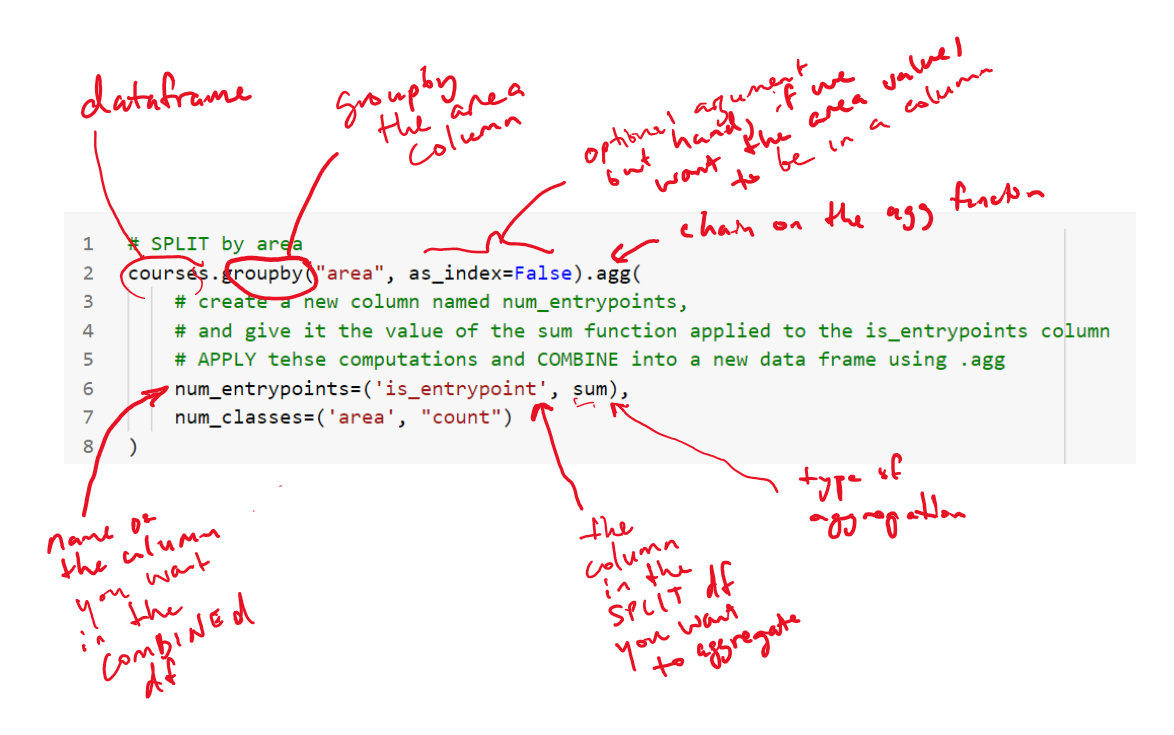

This pattern is explained in the section "Recommended: Tuple Named Aggregations" in this article: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [ ]:
# group the courses by the area column (and make sure that they show up as columns in the resulting dataframe)
# then apply the functions in the .agg() function to each subgroup
# and stitch it back into a dataframe that we'll put into the entrypoints_by_area variable
entrypoints_by_area = courses.groupby("area", as_index=False).agg(
    # create a new column named num_entrypoints, 
    # and give it the value of the sum function applied to the is_entrypoints column
    the_num_entrypoints=('is_entrypoint', "sum"), 
    num_classes=('area', "count")
)
entrypoints_by_area

In [ ]:
# let's now compute the proportion of entry point classes, as a proxy for "openness"

# step 1: define the function
def openness(row):
    return row['num_entrypoints']/row['num_classes']

# step 2: apply the function and save the results
entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)

entrypoints_by_area

In [1]:
# what are some fun groupbys we can do on the other datasets?

# e.g., for donations, we can do average and sum and range, etc. by team
# or number of wins by conference in ncaa
# or total sales per hour of day for bread

In my experience, this works really well for standard analysis tasks, but is less flexible than the manual approach. This approach would be tough to adapt easily for the bread Project 4, for example. I also like teaching the manual approach first for getting an intuition for what is happening under the hood.

## Extras

This is stuff we may not get to in class but is available because it may be useful for your projects and beyond (though you can certainly solve Project 4 without these).

### Use `.value_counts()` to summarize categorical data in your dataframe

Last week we learned how to compute some basic statistics, overall, and by column, for quantitative data. Today, we'll learn how to use `value_counts()` to quickly summarize *categorical* data.

`.value_counts()` does exactly what you think it might do based on the name: it counts the frequency of each unique value in a column! In other words, it gives us a way to count how many times each value shows up in a column. In this way, it's kinda similar to the basic "count-based" indexing we did in Module 3.

*Hint: this could be useful for Problem 4 for Project 4!*

Here's an example for the courses data: how many times does each "area" show up?

In [ ]:
# access the area column in the courses dataframe
# and apply the value_counts method to that column
courses['area'].value_counts()

The syntax here is:

nameOfDataFrame['nameOfColumn'].value_counts()

`value_counts()` is a method that a Pandas *series* (i.e., column in a dataframe) data structure can do (again, make the connection back to `.append()` for lists, and `.split()` for strings).

Let's try some other queries!

In [ ]:
# for ncaa dataset
# how many entries do we have for each conference?

In [ ]:
# for bls data
# how many entries do we have for each category?

Value counts returns a series, which has nice properties of both lists and dictionaries.

Like lists, we can sort it using the `.sort_values()` method, though we need to make sure to either force it to run "in place" (with `inplace=True` as an argument for `.sort_values()`), or save it to a variable.

In [ ]:
area_counts.sort_values(ascending=True)

And access items by index position, which allows us to get the first thing, or the first 5 things, or the last 5 things, etc.

In [ ]:
# get the first value in the series
# note: you only get the value, not the "name"
area_counts[0]

In [ ]:
area_counts[:5]

In [ ]:
area_counts = courses['area'].value_counts()
# like a cross between a dictionary anda  list
# can get value by named key like a dict
print("INST", area_counts['INST'])
print("most frqeuent item count", area_counts[0])

In [ ]:
area_counts.keys()

In [ ]:
# let's say we want the top 5 most populous areas
# we can slice/subset the series just like a list
# and then get the keys from that subset
area_counts[:5].keys()

In [ ]:
# let's try with the other datasets!
# ncaa-team-data
# bls-by-category
# BreadBasket_DMS
bread = pd.read_csv(f'{folder}/BreadBasket_DMS.csv')
bread.head()

In [ ]:
# how do we get the frequency counts for items in the bread dataframe?
bread['Item'].value_counts()

### Plotting


The main library for plotting in Python is `matplotlib`. You can learn that library later. It has lots of fine-grained controls.

For now, you can use pandas "wrapper" over matplotlib (basically calling matplotlib from inside pandas), which is a bit easier to learn.

In [ ]:
entrypoints_by_area

In [ ]:
def openness(row):
    return row['num_entrypoints']/row['num_classes']

entrypoints_by_area['openness'] = entrypoints_by_area.apply(openness, axis=1)
entrypoints_by_area

In [ ]:
# sort the data by the openness column
# make sure we assign to the entry points variable again so we don't lose it (bc pandas treats dataframes as immutable, like strings, unless we force it to do otherwise)
entrypoints_by_area = entrypoints_by_area.sort_values(by="openness", ascending=False)
entrypoints_by_area

In [ ]:
# plot openness by area
entrypoints_by_area.plot(
    x="area", 
    y="openness", 
    kind='bar', 
    xlabel="AREA", 
    ylabel="Proportion of entry point classes",
    title="Classes openness by area"
)

In [ ]:
entrypoints_by_area.plot(y="openness", kind="hist")

In [ ]:
entrypoints_by_area.sort_values(by="num_classes", ascending=False).plot(x="area", y="num_classes", kind="bar")

## Reminder: More resources

The pandas website is decent place to start: https://pandas.pydata.org/

This "cheat sheet" is also a really helpful guide to more common operations that you may run into later: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

There are also many blogs that are helpful, like towardsdatascience.com

The cool thing about pandas and data analysis in python is that many people share notebooks that you can inspect / learn from / adapt code for your own projects (just like mine!).